In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,  RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# Загрузка датасета

Инициализируем датасет 

In [2]:
data = pd.read_csv('../data/weatherAUS.csv')
pd.set_option('display.max_columns', 30)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Заметим, что в датасете есть пропуски. Рассмотрим процент пропусков в каждом из столбцов:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

# Подготовка данных

## Обработка пропущенных значений

Проверим число явных дубликатов:

In [5]:
data.duplicated().sum()

0

Поскольку процент пропусков в Sunshine, Evaporation, Cloud3pm, Cloud9am несоразмерно велик по сравнению с любым другим столбцом, рассмотрим их отдельно. Поэтому для начала заполним модой данные в остальных столбцах, кроме RainTomorrow. Все пропуски в нем удалим для достоверности целевого признака.

In [6]:
data.dropna(inplace = True, subset=['RainTomorrow'])

In [7]:
columns = ['Pressure9am', 'Pressure3pm', 'WindDir9am', 'WindGustDir',      
            'WindGustSpeed', 'Humidity3pm', 'WindDir3pm', 'Temp3pm',   
            'Rainfall', 'RainToday', 'WindSpeed3pm', 'Humidity9am', 
            'Temp9am', 'WindSpeed9am', 'MinTemp',  'MaxTemp']  

for column in columns:
    mode = data[column].mode().iat[0]
    data[column].fillna(mode, inplace = True)

In [8]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Sunshine         47.692924
Evaporation      42.789026
Cloud3pm         40.152469
Cloud9am         37.735332
Date              0.000000
Humidity9am       0.000000
RainToday         0.000000
Temp3pm           0.000000
Temp9am           0.000000
Pressure3pm       0.000000
Pressure9am       0.000000
Humidity3pm       0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Location          0.000000
WindDir3pm        0.000000
WindDir9am        0.000000
WindGustSpeed     0.000000
WindGustDir       0.000000
Rainfall          0.000000
MaxTemp           0.000000
MinTemp           0.000000
RainTomorrow      0.000000
dtype: float64

Рассмотрим гистограммы, чтобы оценить результат действий:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       88536 non-null   fl

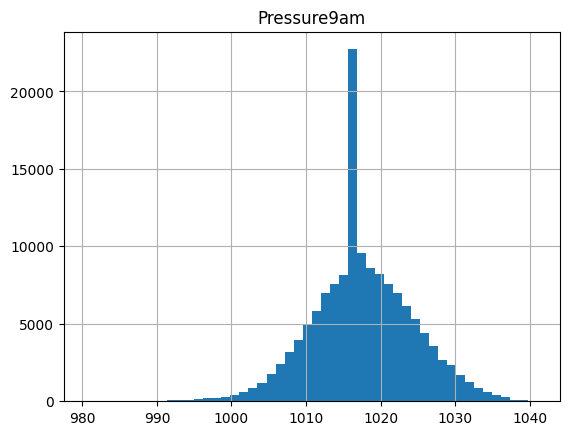

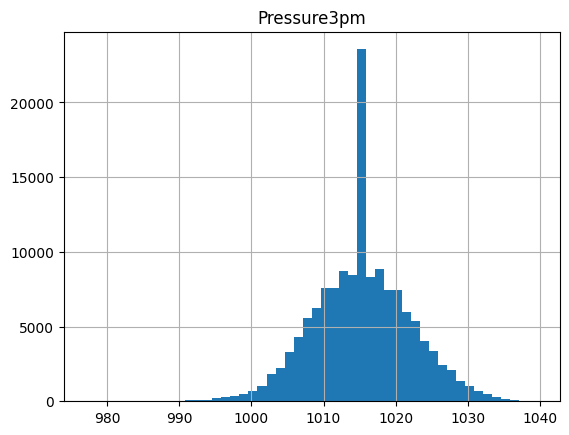

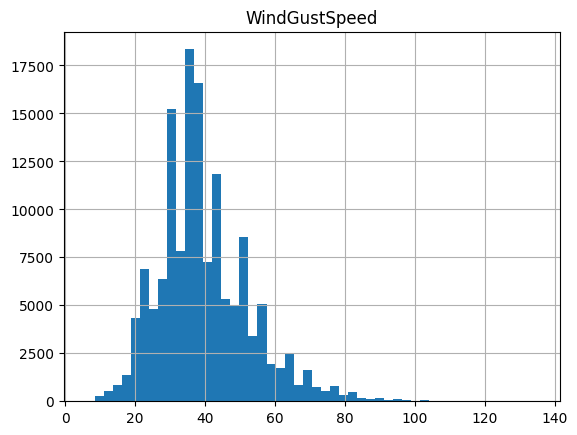

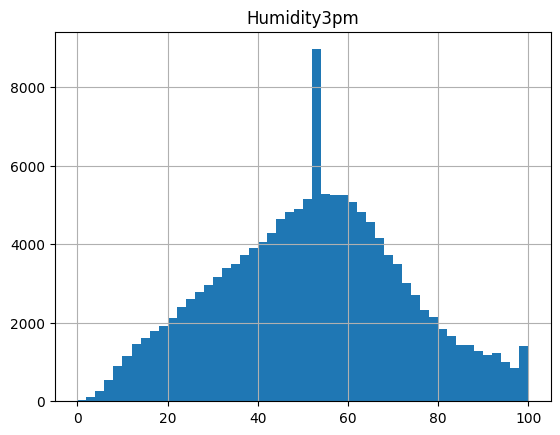

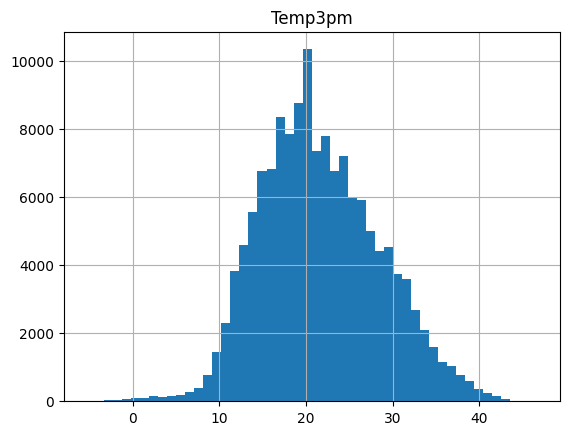

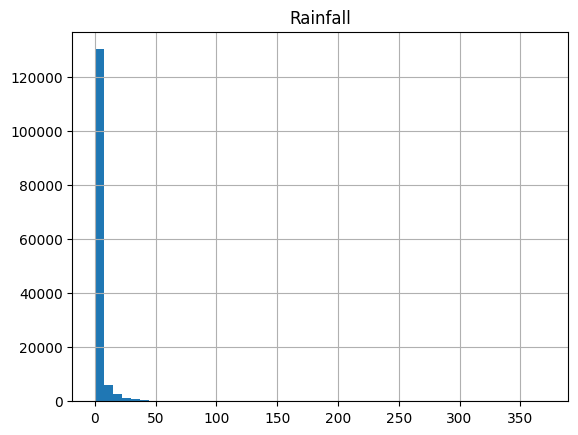

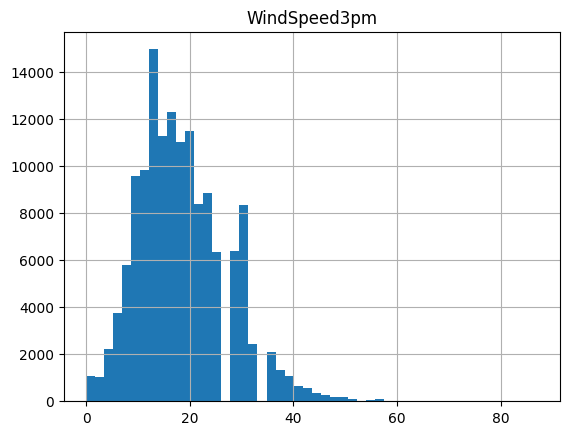

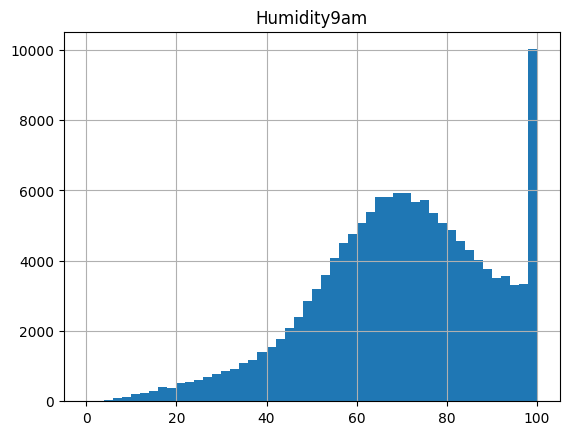

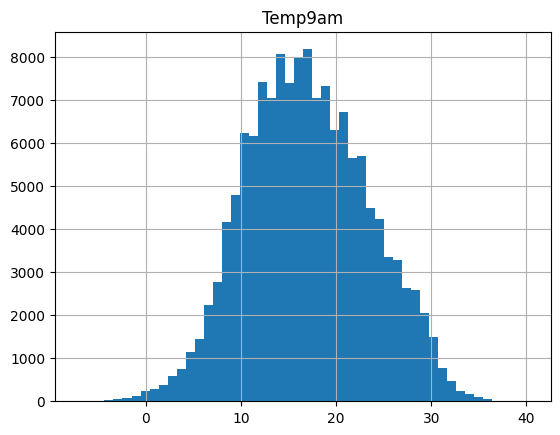

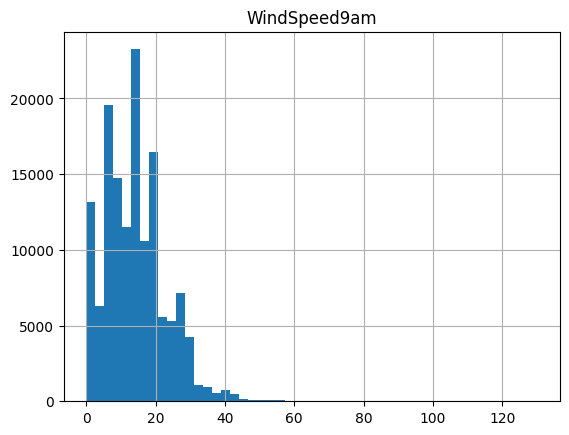

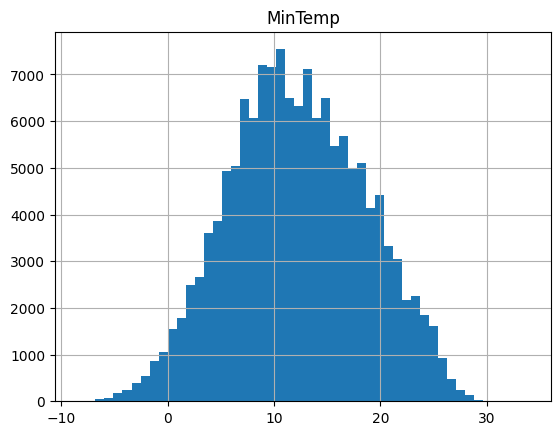

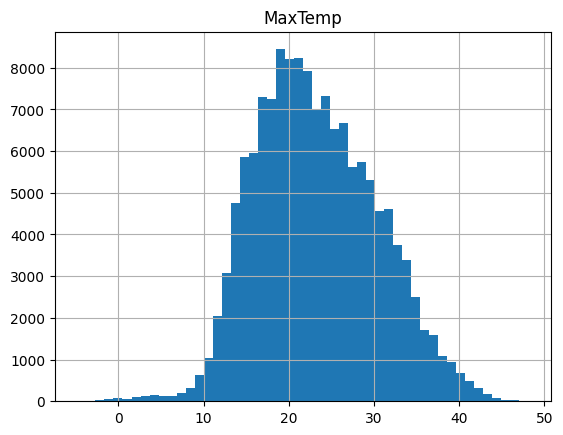

In [10]:
columns.remove('WindGustDir')
columns.remove('WindDir9am')
columns.remove('WindDir3pm')
columns.remove('RainToday')

for column in columns:
    data.hist(column, bins = 50)

Аномалии возникли в Pressure9am, Pressure3pm, Humindity3pm, Rainfall, Humindity9am. Можно заметить, что без них распределение близко к нормальному. В то же время удаление проблемных данных приведет к значительному уменьшению размера выборки. Поэтому принято решение оставить датасет в текущем виде.

Рассмотрим  Sunshine, Evaporation, Cloud3pm, Cloud9am:

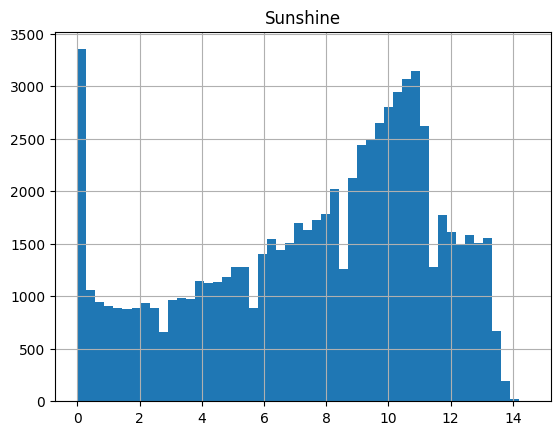

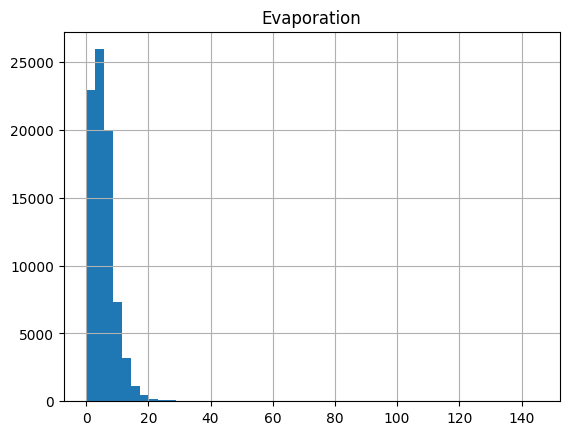

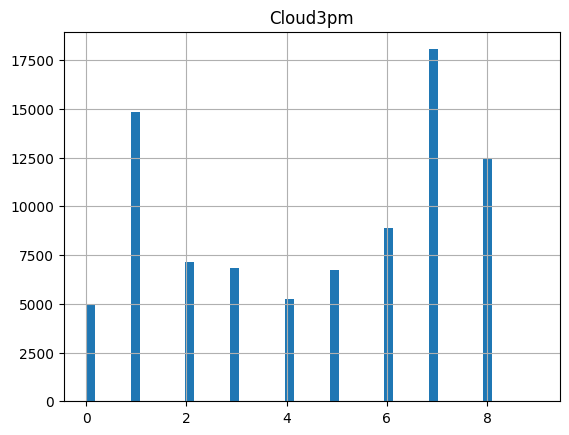

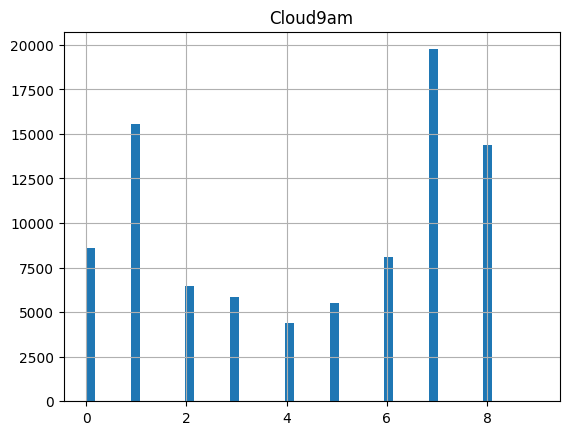

In [11]:
columns = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
for column in columns:
    data.hist(column, bins = 50)

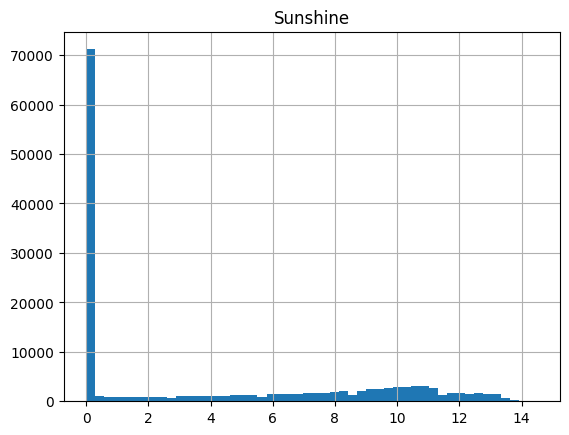

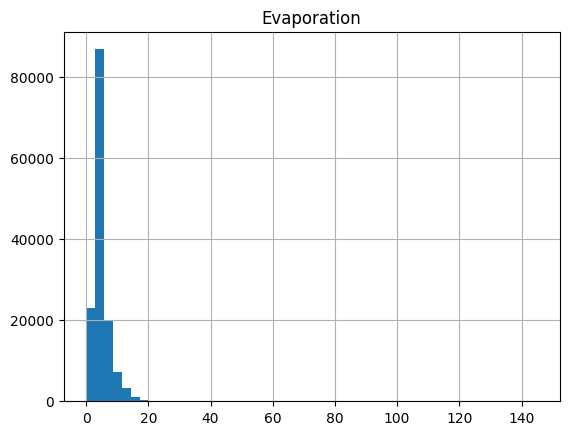

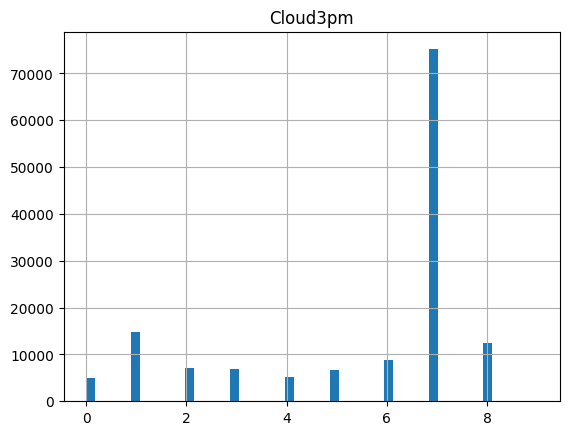

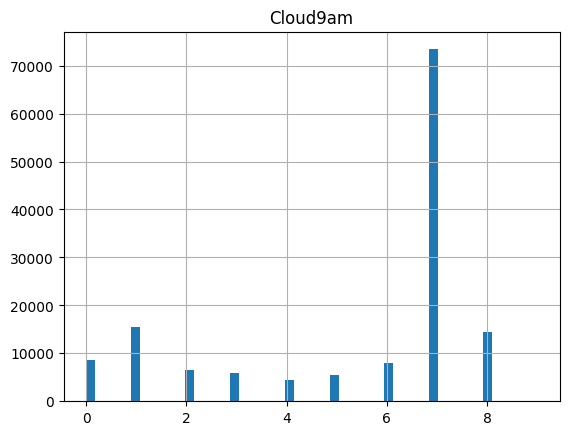

In [12]:
for column in columns:
    mode = data[column].mode().iat[0]
    data[column].fillna(mode, inplace = True)

for column in columns:
    data.hist(column, bins = 50)

Поскольку заполнение пропусков в столбце Sunshine сильно искажает исходный вид данных, собирая результаты большинства наблюдений в окрестности нуля (т.е. делая почти все дни в Австралии пасмурными), это сделает признак малоинформативным. В то же время общее распределение данных в Evaporation сильно не меняется, а Cloud3pm и Cloud9am это происходит в целом умеренно (другие данные хорошо различимы на фоне моды). Поэтому от столбца Sunshine проще всего избавиться.

In [13]:
data.drop(['Sunshine'], axis=1, inplace = True)

In [14]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Date             0.0
Location         0.0
RainToday        0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindDir3pm       0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
RainTomorrow     0.0
dtype: float64

## Кодирование категориальных признаков

In [15]:
cat_columns = ['Location', 'RainToday', 'WindDir3pm', 'WindDir9am', 'WindGustDir', 'RainTomorrow']

In [16]:
for column in cat_columns:
    print(data[column].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
['No' 'Yes']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
['No' 'Yes']


Применим к Location и всем Wind... порядковое кодирование

In [17]:
ordinal_features = ['Location', 'WindDir9am', 'WindGustDir', 'WindDir3pm', 'RainToday']
ordinal_encoder = OrdinalEncoder()

ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features)
])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(data)
encoded_features.head(20)

,ord__Location,ord__WindDir9am,ord__WindGustDir,ord__WindDir3pm,ord__RainToday
0,2.0,13.0,13.0,14.0,0.0
1,2.0,6.0,14.0,15.0,0.0
2,2.0,13.0,15.0,15.0,0.0
3,2.0,9.0,4.0,0.0,0.0
4,2.0,1.0,13.0,7.0,0.0
5,2.0,13.0,14.0,13.0,0.0
6,2.0,12.0,13.0,13.0,0.0
7,2.0,10.0,13.0,13.0,0.0
8,2.0,9.0,6.0,7.0,0.0
9,2.0,8.0,13.0,10.0,1.0


In [18]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ord__Location     142193 non-null  float64
 1   ord__WindDir9am   142193 non-null  float64
 2   ord__WindGustDir  142193 non-null  float64
 3   ord__WindDir3pm   142193 non-null  float64
 4   ord__RainToday    142193 non-null  float64
dtypes: float64(5)
memory usage: 6.5 MB


Закодируем целевой признак и добавим в фрейм к уже обработанным значениям

In [19]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(data['RainTomorrow'])
encoded_data = encoded_features.assign(RainTomorrow=encoded_label)
encoded_data.head()

,ord__Location,ord__WindDir9am,ord__WindGustDir,ord__WindDir3pm,ord__RainToday,RainTomorrow
0,2.0,13.0,13.0,14.0,0.0,0
1,2.0,6.0,14.0,15.0,0.0,0
2,2.0,13.0,15.0,15.0,0.0,0
3,2.0,9.0,4.0,0.0,0.0,0
4,2.0,1.0,13.0,7.0,0.0,0


In [20]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ord__Location     142193 non-null  float64
 1   ord__WindDir9am   142193 non-null  float64
 2   ord__WindGustDir  142193 non-null  float64
 3   ord__WindDir3pm   142193 non-null  float64
 4   ord__RainToday    142193 non-null  float64
 5   RainTomorrow      142193 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 7.1 MB


Удалим обработанные ранее столбцы из исходного фрейма

In [21]:
data.drop(cat_columns, axis = 1, inplace = True)
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,4.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8
1,2008-12-02,7.4,25.1,0.0,4.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3
2,2008-12-03,12.9,25.7,0.0,4.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2
3,2008-12-04,9.2,28.0,0.0,4.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5
4,2008-12-05,17.5,32.3,1.0,4.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   WindGustSpeed  142193 non-null  float64
 6   WindSpeed9am   142193 non-null  float64
 7   WindSpeed3pm   142193 non-null  float64
 8   Humidity9am    142193 non-null  float64
 9   Humidity3pm    142193 non-null  float64
 10  Pressure9am    142193 non-null  float64
 11  Pressure3pm    142193 non-null  float64
 12  Cloud9am       142193 non-null  float64
 13  Cloud3pm       142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
dtypes: float64(15), object(1)
memory usage: 18.4+ MB


Произведем конкатенацию столбцов исходного фрейма и фрейма с обработанными данными

In [23]:
data = pd.concat([data.reset_index(drop = True), encoded_data.reset_index(drop = True)], axis = 1)
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,ord__Location,ord__WindDir9am,ord__WindGustDir,ord__WindDir3pm,ord__RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,4.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,2.0,13.0,13.0,14.0,0.0,0
1,2008-12-02,7.4,25.1,0.0,4.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,2.0,6.0,14.0,15.0,0.0,0
2,2008-12-03,12.9,25.7,0.0,4.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,2.0,13.0,15.0,15.0,0.0,0
3,2008-12-04,9.2,28.0,0.0,4.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,2.0,9.0,4.0,0.0,0.0,0
4,2008-12-05,17.5,32.3,1.0,4.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2.0,1.0,13.0,7.0,0.0,0


Поскольку столбец с датой неинформативен в своем исходном виде, преобразуем значения в соответствующие месяца

In [24]:
data['Date'] = pd.Series(pd.to_datetime(data['Date'].values).month)

In [25]:
data['Date'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
data.head(30)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,ord__Location,ord__WindDir9am,ord__WindGustDir,ord__WindDir3pm,ord__RainToday,RainTomorrow
0,12,13.4,22.9,0.6,4.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,2.0,13.0,13.0,14.0,0.0,0
1,12,7.4,25.1,0.0,4.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,2.0,6.0,14.0,15.0,0.0,0
2,12,12.9,25.7,0.0,4.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,2.0,13.0,15.0,15.0,0.0,0
3,12,9.2,28.0,0.0,4.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,2.0,9.0,4.0,0.0,0.0,0
4,12,17.5,32.3,1.0,4.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2.0,1.0,13.0,7.0,0.0,0
5,12,14.6,29.7,0.2,4.0,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,7.0,7.0,20.6,28.9,2.0,13.0,14.0,13.0,0.0,0
6,12,14.3,25.0,0.0,4.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,7.0,18.1,24.6,2.0,12.0,13.0,13.0,0.0,0
7,12,7.7,26.7,0.0,4.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,7.0,7.0,16.3,25.5,2.0,10.0,13.0,13.0,0.0,0
8,12,9.7,31.9,0.0,4.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,2.0,9.0,6.0,7.0,0.0,1
9,12,13.1,30.1,1.4,4.0,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,7.0,7.0,20.1,28.2,2.0,8.0,13.0,10.0,1.0,0


# Разделение выборки

Выделим столбец с целевым признаком, 

In [27]:
y = data['RainTomorrow']
X = data.drop(['RainTomorrow'], axis=1)

In [28]:
y

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int32

Разделим датасеты на тренировочные и тестовые выборки

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((113754, 21), (113754,), (28439, 21), (28439,))

# Масштабирование

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.99232772,  0.42629743,  0.64334183, ..., -1.50439542,
        -0.61310333, -0.53251477],
       [-0.40918059, -0.01235355, -0.49609958, ..., -0.4391476 ,
        -0.39326599,  1.87788217],
       [-0.11760703, -0.71732833, -1.07285387, ...,  0.83914978,
         1.58527007, -0.53251477],
       ...,
       [ 0.17396654, -0.68599612, -1.55113792, ...,  1.05219934,
         1.14559539, -0.53251477],
       [-0.70075416, -0.05935187,  0.39013263, ...,  0.83914978,
         1.58527007, -0.53251477],
       [ 1.63183436,  0.56729239,  1.19196177, ..., -1.07829629,
        -0.39326599, -0.53251477]])

# Создание и обучение моделей классификации

Проверим уровень дизбаланса между классами 

In [56]:
yes = data[data['RainTomorrow'] == 1]['RainTomorrow'].count()


In [57]:
no = data['RainTomorrow'].count() - yes

In [60]:
print(f'{round((yes/no)*100)}%')

29%


Функции для вывода метрик

In [61]:
def show_metrics(y_test, predict):
    print(classification_report(y_test, predict))
    print(f'f1_score: {f1_score(y_test, predict)}')
    

def show_roc(X_test, y_test, model):
    %matplotlib inline
    
    y_scores = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    
    fig = plt.figure(figsize=(6, 6))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print(f'AUC: {roc_auc_score(y_test, y_scores[:,1])}')

def show_con_mat(y_test, predict):
    print(confusion_matrix(y_test, predict))

## Логистическая регрессия

In [64]:
params = {'C': np.arange(0.01, 1, 0.1)}

In [65]:
lr_optimal = GridSearchCV(LogisticRegression(), params).fit(X_train, y_train)
lr_optimal.best_params_

{'C': 0.81}

In [66]:
lr = LogisticRegression(C = 0.81)
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

In [67]:
show_con_mat(y_test, predict)

[[20956  1251]
 [ 3192  3040]]


In [68]:
show_metrics(y_test, predict)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22207
           1       0.71      0.49      0.58      6232

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439

f1_score: 0.5777820013304191


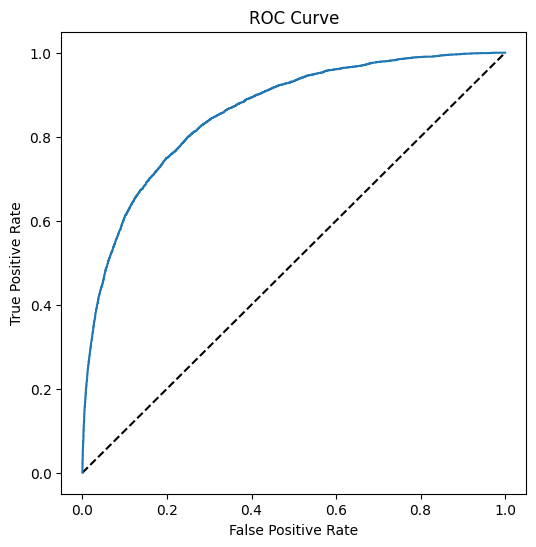

ROC: 0.8586287222922284


In [69]:
show_roc(X_test, y_test, lr)

Видим, что несмотря на достаточно высокий дизбаланс классов модель предсказывает реальные значения хорошо: ROC кривая близка к идеальному варианту, метрики для первого класса достаточно высоки, а для второго в пределах адекватных.

## Метод k ближайших соседей